In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import RocCurveDisplay

In [5]:
churn = pd.read_csv('Customer_churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
churn.shape

(7043, 21)

In [7]:
churn.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [8]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
churn.TotalCharges = pd.to_numeric(churn.TotalCharges, errors = 'coerce')

In [13]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
churn['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [16]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

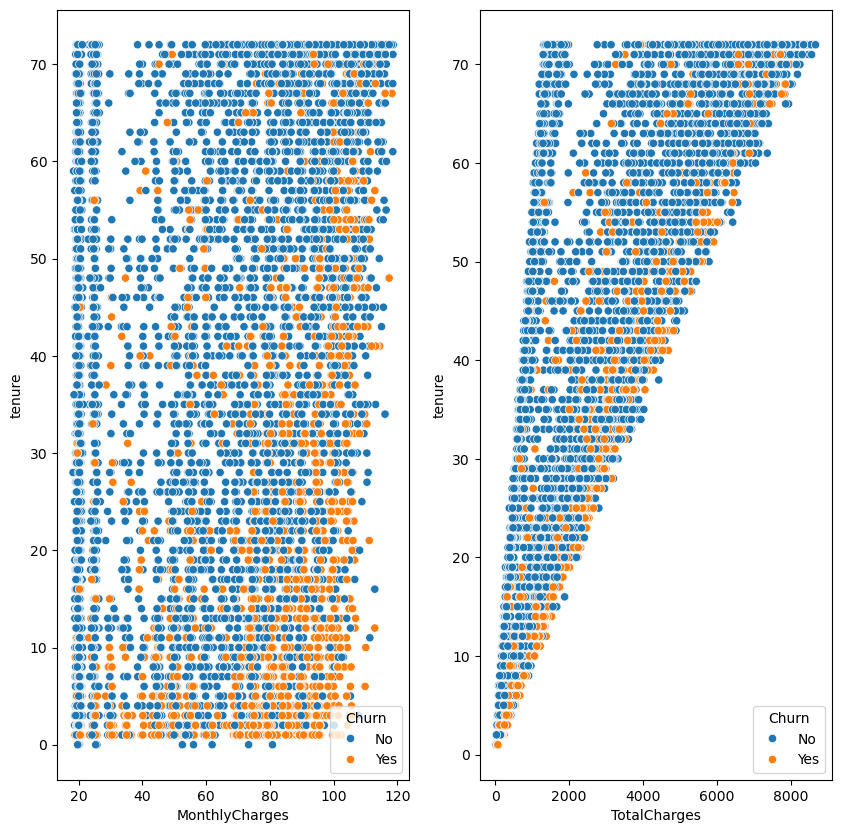

In [17]:
## what other the various inference we can draw :

fig , ax = plt.subplots(1,2,figsize =(10,10))
sns.scatterplot(x = "MonthlyCharges", y ="tenure", hue = "Churn", data = churn, ax = ax[0])
sns.scatterplot(x = "TotalCharges", y ="tenure", hue = "Churn", data = churn, ax = ax[1]);

In [18]:
## let assume churn no means they will renew:
## churn yes means they will not renew :

In [19]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='gender', ylabel='count'>

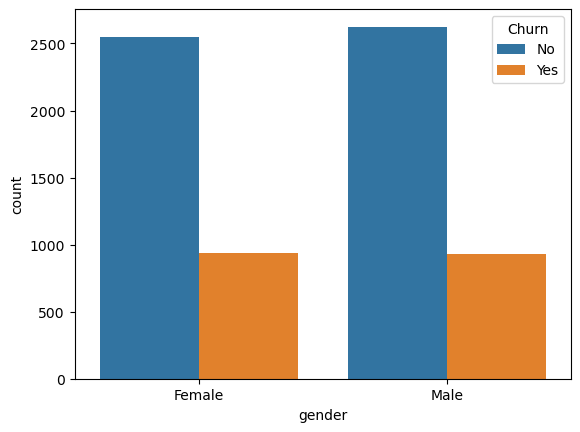

In [20]:
sns.countplot(x = 'gender',hue = 'Churn',data = churn)

<Axes: xlabel='SeniorCitizen', ylabel='count'>

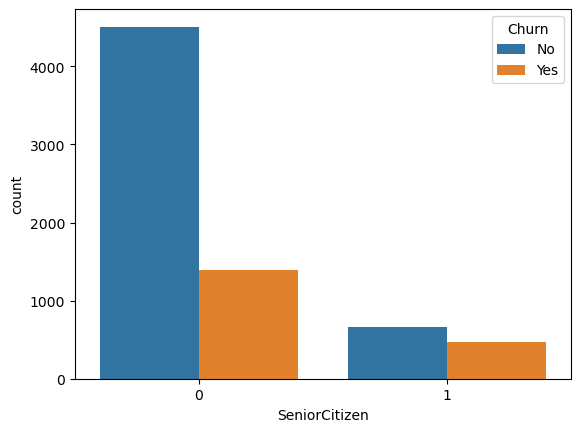

In [21]:
sns.countplot(x = 'SeniorCitizen',hue = 'Churn',data = churn)

<Axes: xlabel='Partner', ylabel='count'>

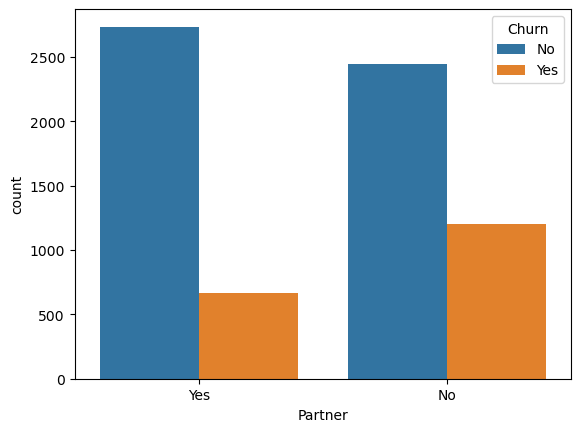

In [22]:

sns.countplot(x = 'Partner',hue = 'Churn',data = churn)

In [23]:
## Next step is to do label encoding on chracter variable:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
## i will divide my whole data into categorical and numeric features:
## then i will do label encoding on categrical features:
## i will concat both the dataset to achieve my main data which i will use for Model building:

num = churn.select_dtypes(include = np.number)
obj = churn.select_dtypes(include = object)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

obj2 = obj.apply(le.fit_transform)
obj2.head(2)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,5375,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0


In [26]:
churndf = pd.concat([num,obj2],axis =1)
print(churn.shape)
churndf.head(2)
print(churndf.shape)

(7043, 21)
(7043, 21)


In [27]:
y = churndf['Churn']
x = churndf.drop(['Churn','customerID','TotalCharges'],axis =1)

In [28]:
x

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,34,56.95,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,2,53.85,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0,45,42.30,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,2,70.70,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,72,103.20,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,11,29.60,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,4,74.40,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [29]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [30]:
#i will buld my model in x_train and y_train and will validate my model via confusion matrix on x_test and y_test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)
print(x_train.shape)
print(x_test.shape)

(5634, 18)
(1409, 18)


In [31]:
from sklearn.linear_model import LogisticRegression
Le = LogisticRegression()

In [32]:

Le.fit(x_train, y_train)

C:\Users\Admin\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
Le.score(x_train, y_train)

0.8047568335108272

In [35]:
predictions = Le.predict(x_test)

In [36]:
Le.score(x_test, y_test)

0.7927608232789212

In [37]:
classification_report(predictions, y_test)

'              precision    recall  f1-score   support\n\n           0       0.88      0.85      0.86      1079\n           1       0.55      0.61      0.58       330\n\n    accuracy                           0.79      1409\n   macro avg       0.71      0.73      0.72      1409\nweighted avg       0.80      0.79      0.80      1409\n'

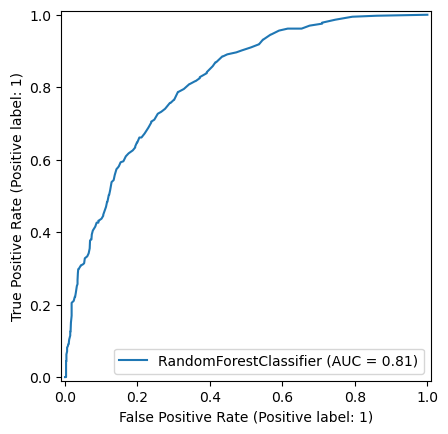

In [48]:
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier

# Define the classifier
clf = RandomForestClassifier()

# Fit the classifier on training data
clf.fit(x_train, y_train)

# For an estimator clf and test data X_test, y_test
RocCurveDisplay.from_estimator(clf, x_test, y_test)

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

treemodel = tree.fit(x_train,y_train)
treemodel.score(x_train,y_train)

0.9976925807596734

In [50]:
## validate the model on test dataset:
testmodel =  treemodel.score(x_test,y_test)
print(testmodel)

0.716820440028389


In [51]:
## how to generate confusion matrix on test dataset:

test_predict =treemodel.predict(x_test)
classification_report(y_test,test_predict)

'              precision    recall  f1-score   support\n\n           0       0.82      0.79      0.81      1043\n           1       0.46      0.50      0.48       366\n\n    accuracy                           0.72      1409\n   macro avg       0.64      0.65      0.64      1409\nweighted avg       0.73      0.72      0.72      1409\n'

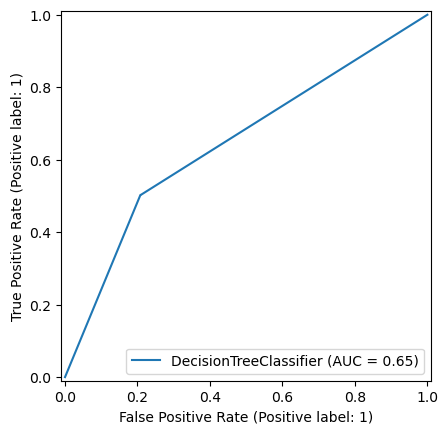

In [53]:
RocCurveDisplay.from_estimator(treemodel,x_test,y_test)

[Text(0.5, 0.875, 'x[15] <= 0.5\ngini = 0.391\nsamples = 5634\nvalue = [4131.0, 1503.0]'),
 Text(0.25, 0.625, 'x[9] <= 0.5\ngini = 0.49\nsamples = 3113\nvalue = [1776.0, 1337.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 7.5\ngini = 0.5\nsamples = 2108\nvalue = [1032.0, 1076.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[2] <= 91.45\ngini = 0.385\nsamples = 1005\nvalue = [744, 261]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[2] <= 93.675\ngini = 0.123\nsamples = 2521\nvalue = [2355, 166]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[9] <= 0.5\ngini = 0.08\nsamples = 1900\nvalue = [1821, 79]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[1] <= 70.5\ngini = 0.241\nsamples = 621\nvalue = [534.0, 87.0]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

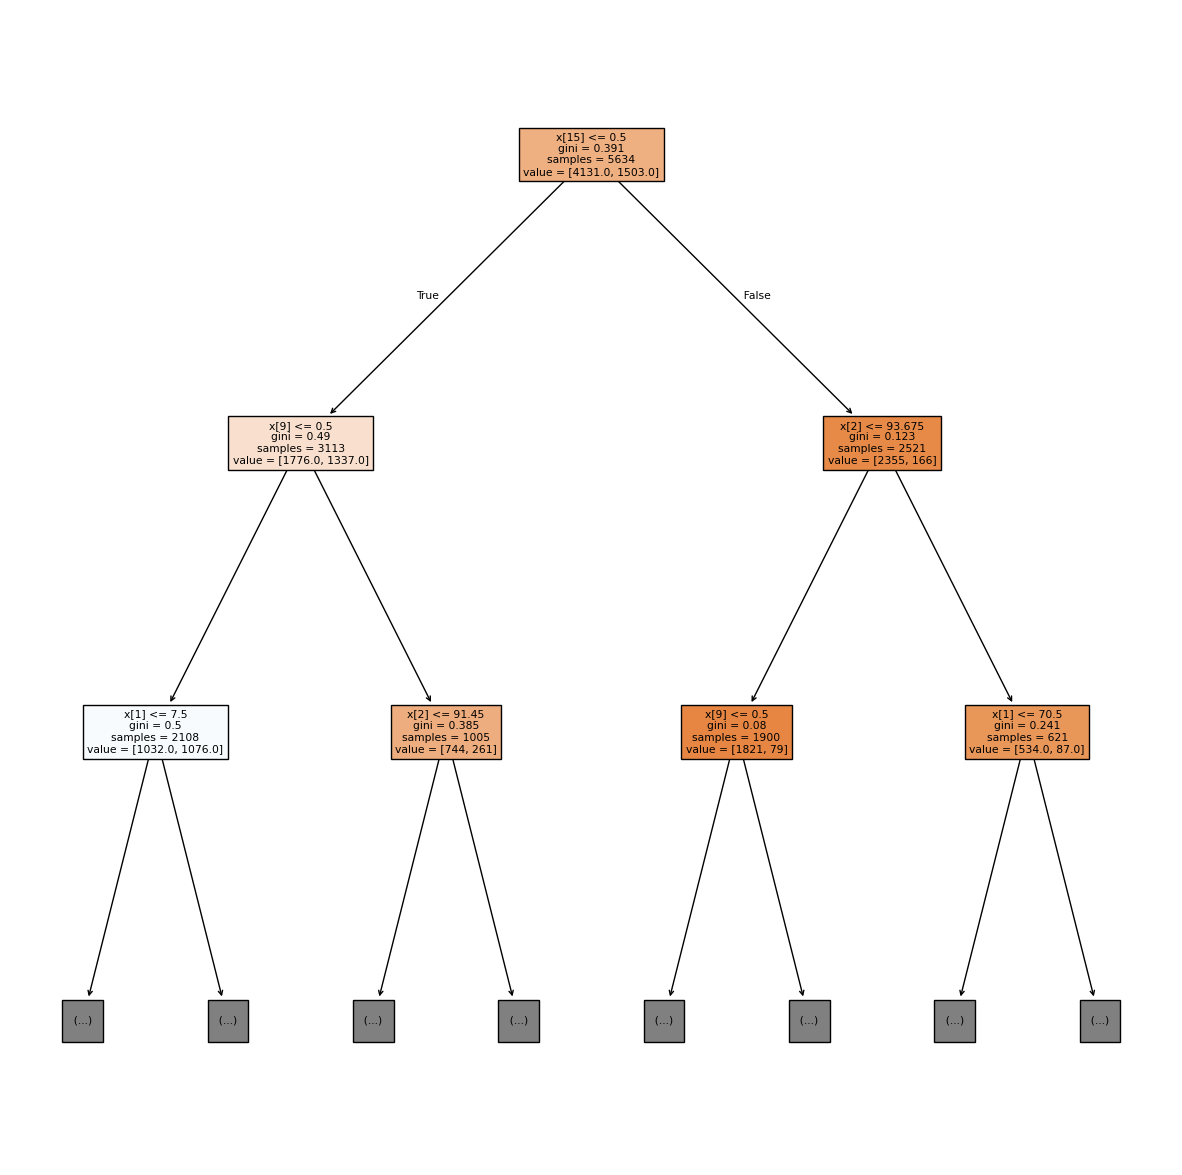

In [54]:
## how to check the tree:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,15))
plot_tree(treemodel,max_depth =2,filled = True)

In [55]:
from sklearn.tree import export_text
r = export_text(treemodel, feature_names=(list(x_train.columns)))
print(r)

|--- Contract <= 0.50
|   |--- OnlineSecurity <= 0.50
|   |   |--- tenure <= 7.50
|   |   |   |--- InternetService <= 0.50
|   |   |   |   |--- PaperlessBilling <= 0.50
|   |   |   |   |   |--- tenure <= 5.50
|   |   |   |   |   |   |--- MonthlyCharges <= 45.53
|   |   |   |   |   |   |   |--- SeniorCitizen <= 0.50
|   |   |   |   |   |   |   |   |--- PaymentMethod <= 2.50
|   |   |   |   |   |   |   |   |   |--- MonthlyCharges <= 45.05
|   |   |   |   |   |   |   |   |   |   |--- MonthlyCharges <= 30.30
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- MonthlyCharges >  30.30
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- MonthlyCharges >  45.05
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- PaymentMethod >  2.50
|   |   |   |   |   |   |   |   |   |--- MonthlyCharges <= 34.32
|   |   |   |   |   |   